<a href="https://colab.research.google.com/github/smokingelephants/CS898BG/blob/main/basic_tf_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import numpy as np
#import argparse

In [2]:
# grab the MNIST dataset (if this is your first time using this
# dataset then the 11MB download may take a minute)
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] accessing MNIST...


In [3]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [4]:
# #Implementing feedforward neural networks with Keras and TensorFlow
# # define the 784-256-128-10 architecture using Keras
# model = Sequential()
# model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
# model.add(Dense(128, activation="sigmoid"))
# model.add(Dense(10, activation="softmax"))

In [5]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.h0 = Dense(6, activation='sigmoid')
    self.h1_0 = Dense(4, activation='sigmoid')
    self.h1_1 = Dense(4, activation='sigmoid')
    self.h2_0 = Dense(3, activation='sigmoid')
    self.h2_1 = Dense(3, activation='sigmoid')
    self.h3 = Dense(5, activation='sigmoid')
    self.o0 = Dense(10, activation="softmax")

  def call(self, x):
    x = self.h0(x)
    x1_0 = self.h1_0(x)
    x1_1 = self.h1_1(x)
    x2_0 = self.h2_0(x1_0)
    x2_1 = self.h2_1(x1_1)
    merged = concatenate([x2_0, x2_1])
    x = self.h3(merged)

    x = self.o0(x)
    return x

# Create an instance of the model
model = MyModel()


In [6]:
#Implementing feedforward neural networks with Keras and TensorFlow
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
	epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100
469/469 [==============================] - 10s 9ms/step - loss: 2.3359 - accuracy: 0.0993 - val_loss: 2.3087 - val_accuracy: 0.1032
Epoch 2/100
469/469 [==============================] - 4s 8ms/step - loss: 2.3046 - accuracy: 0.1079 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 3/100
469/469 [==============================] - 4s 9ms/step - loss: 2.3015 - accuracy: 0.1124 - val_loss: 2.3009 - val_accuracy: 0.1135
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3008 - val_accuracy: 0.1135
Epoch 5/100
469/469 [==============================] - 2s 4ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3007 - val_accuracy: 0.1135
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 2.3010 - accuracy: 0.1124 - val_loss: 2.3007 - val_accuracy: 0.1135
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 2.3009 - accuracy: 0.1124 - val_loss: 2

In [7]:
model.trainable_weights

[<tf.Variable 'my_model/dense/kernel:0' shape=(784, 6) dtype=float32, numpy=
 array([[ 0.05851942,  0.04840426,  0.08590589,  0.07578063, -0.05984595,
         -0.0741769 ],
        [-0.07966674, -0.01086608, -0.04393978,  0.01577209, -0.07559425,
          0.00413296],
        [ 0.03805827,  0.08409375,  0.02610597, -0.0512399 ,  0.00451924,
         -0.03022257],
        ...,
        [-0.07047868,  0.06664738,  0.00366922,  0.06148815,  0.06534423,
          0.06573103],
        [-0.03700846,  0.02074578,  0.02018707,  0.01870146, -0.07160792,
          0.02885106],
        [ 0.0365172 ,  0.06832735, -0.06332532, -0.06582675,  0.04146898,
          0.02152365]], dtype=float32)>,
 <tf.Variable 'my_model/dense/bias:0' shape=(6,) dtype=float32, numpy=
 array([-0.04718719,  0.11351114, -0.07309797, -0.11992817,  0.07850886,
        -0.08494603], dtype=float32)>,
 <tf.Variable 'my_model/dense_1/kernel:0' shape=(6, 4) dtype=float32, numpy=
 array([[-1.5454155 , -1.1795053 ,  1.055002  , -0

In [8]:
#Implementing feedforward neural networks with Keras and TensorFlow
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1),
	target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.23      0.89      0.37      1135
           2       0.48      0.68      0.56      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.66      0.45      0.53       958
           7       0.31      0.89      0.46      1028
           8       0.38      0.17      0.24       974
           9       0.13      0.02      0.03      1009

    accuracy                           0.32     10000
   macro avg       0.22      0.31      0.22     10000
weighted avg       0.22      0.32      0.22     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


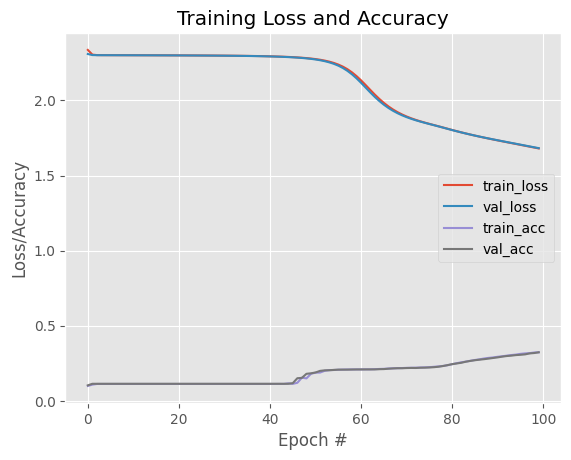

In [9]:
#Implementing feedforward neural networks with Keras and TensorFlow
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
#plt.savefig(args["output"])